# **Blackjack Card Counting**
___

By Evan Gandy

Make sure you have all of the librarries below avaliable

If you need to run pip install:

```
pip install matplotlib pandas numpy statistics
```
___

## **Overview**

This project simulates a lot of hands of blackjack using different card counting variables. The simulation tracks the money won or lost, bet amounts, and the running count of the cards.

The markdown / jupyter notebook style is inspired by Shouvik

**Key features:**

- Card Counting: The simulation uses the ```data.csv``` file as a refrence for the general blackjack strategy

- Multiple Games: The code runs thousands of hands to provide a a big enough sample to calculate an edge

- Data Collection: Then in this file I record money, bets, and card count history
    - The final amount won is printed
    - The total bet volume (how much money you would have had to risk)
    - The edge (the ratio of money won to money risked)

- Visualization: Then I plot all of the data for analysis

    - Money won or lost over the course of the games
    
    - Bet amounts per game
    
    - Accumulated money over the rounds, including a trend line

## **Sources**

### **Blackjack Game Logic & Card Counting**

1. https://wizardofodds.com/games/blackjack/
2. https://www.countingedge.com/
3. https://www.techopedia.com/gambling-guides/blackjack-strategy (csv strategy table adapated from here)
4. https://www.reddit.com/r/blackjack/ random things on here
5. https://www.youtube.com/watch?v=vHtlrL2v61o (strategy types)
6. https://everydayblackjack.com/blog/omega-ii-card-counting-system/

### **Coding Errors & Issues**

1. https://stackoverflow.com/questions/50827846/how-can-multiple-files-be-opened-in-visual-studio-code-vsc (ipynb & python files)
2. https://builtin.com/articles/python-circular-import (circular importing issue between classes)
3. https://docs.python.org/3/library/csv.html (importing csv)
4. https://www.analyticsvidhya.com/blog/2021/08/python-tutorial-working-with-csv-file-for-data-science/
5. https://stackoverflow.com/questions/52400408/import-csv-file-into-python
6. https://stackoverflow.com/questions/6740918/creating-a-dictionary-from-a-csv-file (eventually used some ai to get csv import to work)
7. https://wiki.python.org/moin/PythonSpeed/PerformanceTips (improving runtime of thhis file)
8. https://www.geeksforgeeks.org/python-program-to-find-cumulative-sum-of-a-list/ (improving runtime)

### **Plotting**

1. https://matplotlib.org/
2. https://www.tutorialspoint.com/matplotlib/index.htm
3. https://www.w3schools.com/python/pandas/default.asp
4. https://realpython.com/numpy-tutorial/

In [8]:
from Blackjack import Game

# make sure all of these li
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

In [9]:
# modify these variables to change the the game
GAMES = 50000
SHOE_SIZE = 2
SHOE_PENETRATION = 0.25
BET_SPREAD = 50
DECK_SIZE = 52

## **Gameplay**

The following code simulates all the games

1. **Setup:**
   - It creates empty lists to keep track of how much money is won (`money`), how much money is bet (`bets`), and the history of card counting (`countings`).
   - It sets a counter (`nb_hands`) to zero to count the total number of hands played.

2. **Play Many Games:**
   - It repeats the following steps for a set number of games:
      - Starts a new game of blackjack.
      - Keeps playing rounds of blackjack until the cards need to be reshuffled.
      - During each round, it counts the cards to try to predict if the player or dealer is more likely to win and then bets accordinly
      - After the game, it records how much money was won or lost, how much was bet in total, and the card counting history.
      - You can uncomment a line to see the game by game play through however if you change the # of games past 10,000 I would leave it uncommented

3. **Calculate Results:**
   - It adds up all the money won/lost across all games (`money_won`).
   - It adds up all the bets made across all games (`bet_volume`).
   - It calculates the overall percentage of money won compared to the total amount bet. This percentage shows the effectiveness of the card counting.

4. **Show Results:**
   - It prints the total money won/lost, the total amount bet, and the percentage of money won compared to the total amount bet.
   - Usually the edge value should be between 1% to 4%, the greater the edge the more effective the strategy.


In [10]:
money = []
bets = []
countings = []
nb_hands = 0

for g in range(GAMES):
    game = Game(GAMES, SHOE_SIZE, SHOE_PENETRATION, BET_SPREAD, DECK_SIZE)
    while not game.shoe.reshuffle:
        game.play_round()
        nb_hands += 1

    money.append(game.get_money())
    bets.append(game.get_bet())
    countings += game.shoe.count_history

    # uncomment this line to see a game by game bet
    # print("Game %d: %s (%s bet)" % (g + 1, "{0:.2f}".format(game.get_money()), "{0:.2f}".format(game.get_bet())))

money_won = sum(money)
bet_volume = sum(bets)
#print("-" * 30)
print("Money Won: ${:,.2f}".format(money_won))
print("Bet Volume: ${:,.2f}".format(bet_volume))
print("Overall winnings: ${} (EDGE = {} %)".format("{0:.2f}".format(money_won), "{0:.3f}".format(100.0 * money_won/bet_volume)))

Money Won: $155,538.50
Bet Volume: $6,864,141.00
Overall winnings: $155538.50 (EDGE = 2.266 %)


## **Plotting**

All of the following code plots the data recorded from above

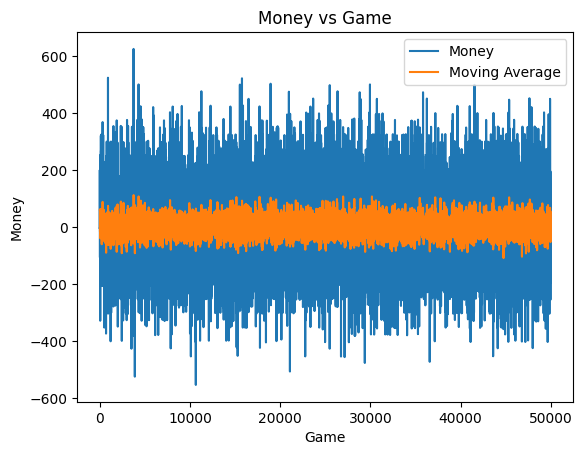

Average Money: $3.11


In [11]:
money_series = pd.Series(money)

# Calculate the moving average with a window size of 10
moving_average = money_series.rolling(window=10).mean()

# Plot the original data and the moving average
plt.plot(money_series, label='Money')
plt.plot(moving_average, label='Moving Average') #
plt.xlabel('Game')
plt.ylabel('Money')
plt.title('Money vs Game')
plt.legend()
plt.show()

average_money = statistics.mean(money)
print("Average Money: ${:,.2f}".format(average_money))

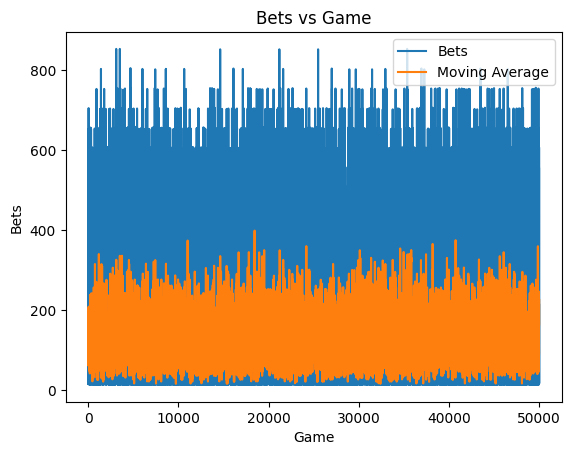

Average Bet: $137.28


In [12]:
# Convert the 'money' list to a pandas Series
money_series = pd.Series(bets)

# Calculate the moving average with a window size of 10
moving_average = money_series.rolling(window=10).mean()

# Plot
plt.plot(money_series, label='Bets')
plt.plot(moving_average, label='Moving Average') #
plt.xlabel('Game')
plt.ylabel('Bets')
plt.title('Bets vs Game')
plt.legend()
plt.show()

average_bet = bet_volume / GAMES
print("Average Bet: ${:,.2f}".format(average_bet))

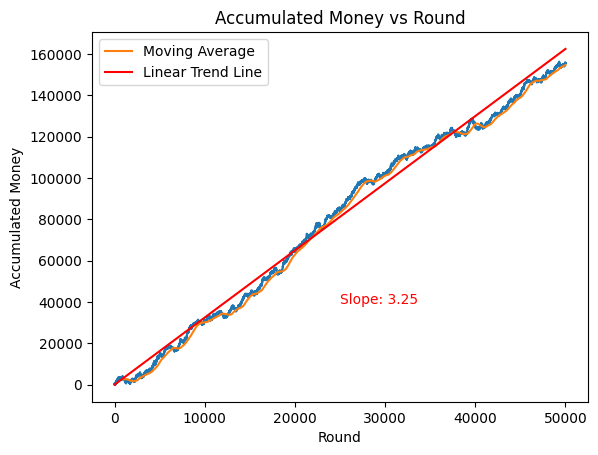

In [13]:
accumulated_money = []
last_sum = 0

for i in range(len(money)):
    last_sum += money[i]
    accumulated_money.append(last_sum)

slope, _ = np.polyfit(range(len(accumulated_money)), accumulated_money, 1)

plt.plot(accumulated_money)
plt.xlabel('Round')
plt.ylabel('Accumulated Money')
plt.title('Accumulated Money vs Round')

moving_average = pd.Series(accumulated_money).rolling(window=1000).mean()

plt.plot(moving_average, label='Moving Average')

# linear trend line
x = range(len(accumulated_money))
y = slope * np.array(x) + accumulated_money[0]

plt.plot(x, y, color='red', label='Linear Trend Line')

# Label the slope
plt.text(len(accumulated_money) / 2, max(accumulated_money) / 4, f'Slope: {slope:.2f}', color='red')

plt.legend()
plt.show()